# Project description

The task is to predict the CO2 emissions and total energy consumption of non-residential buildings in Seattle for which these values have not been measured yet.

Additionally, there is an interest in evaluating the usefulness of the "ENERGY STAR Score" for emissions prediction, as the current approach used by the team is tedious to calculate. The score will be integrated into the modeling process to assess its value.

This is the first of three notebooks documenting this project.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\zheng\\Documents\\Openclassrooms\\Data Scientist\\Project_04\\2016_Building_Energy_Benchmarking.csv")
pd.set_option('display.max_columns', None)

In [3]:
df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


# Data Cleaning

In [4]:
# Check the shape and column names of the dataset
print("Shape of the dataset:", df.shape)
print("\n")
print("Columns of the dataset:", df.columns)

Shape of the dataset: (3376, 46)


Columns of the dataset: Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'De

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [6]:
# Count the number of categorical and numerical variables
print("Number of categorical variables:", len(df.select_dtypes(include='object').columns))
print("Number of numerical variables:", len(df.select_dtypes(exclude='object').columns))

Number of categorical variables: 15
Number of numerical variables: 31


In [7]:
# Remove columns with only one unique value
single_value_columns = df.columns[df.nunique() == 1].tolist()
df.drop(columns=single_value_columns, inplace=True)

In [8]:
# Select one variable to represent property type and remove the rest
df.drop(columns=["BuildingType", "ListOfAllPropertyUseTypes"], inplace=True)

## Non-Residential Buildings

In [9]:
# Identify residential property types using the PrimaryPropertyType variable
residential = [
    "Low-Rise Multifamily",
    "Mid-Rise Multifamily",
    "High-Rise Multifamily",
    "Hotel",
    "Senior Care Community",
    "Residence Hall"
]

In [10]:
# Filter out residential buildings based on PrimaryPropertyType
df_non_residential = df[~df["PrimaryPropertyType"].isin(residential)].copy()

In [11]:
# Filter out residential buildings based on LargestPropertyUseType
residential2 = [
    "Multifamily Housing",
    "Hotel",
    "Senior Care Community",
    "Residence Hall/Dormitory"
]
df_non_residential = df_non_residential[
    ~df_non_residential["LargestPropertyUseType"].isin(residential2)
]

In [12]:
# Recherche de types de bâtiments résidentiels selon le variable LargestPropertyUseType
df_non_residential.LargestPropertyUseType.value_counts()

Office                                                  498
Non-Refrigerated Warehouse                              199
K-12 School                                             139
Other                                                   102
Retail Store                                             99
Worship Facility                                         71
Distribution Center                                      54
Medical Office                                           41
Supermarket/Grocery Store                                41
Parking                                                  32
Other - Recreation                                       31
Self-Storage Facility                                    28
College/University                                       25
Other - Entertainment/Public Assembly                    21
Laboratory                                               13
Restaurant                                               12
Refrigerated Warehouse                  

In [13]:
# Supprimer les bâtiments résidentiels selon LargestPropertyUseType.
residential2 = [
    "Multifamily Housing",
    "Hotel",
    "Senior Care Community",
    "Residence Hall/Dormitory",
]
df_non_residential = df_non_residential[
    ~df_non_residential["LargestPropertyUseType"].isin(residential2)
]

## Grouping Property Type Values

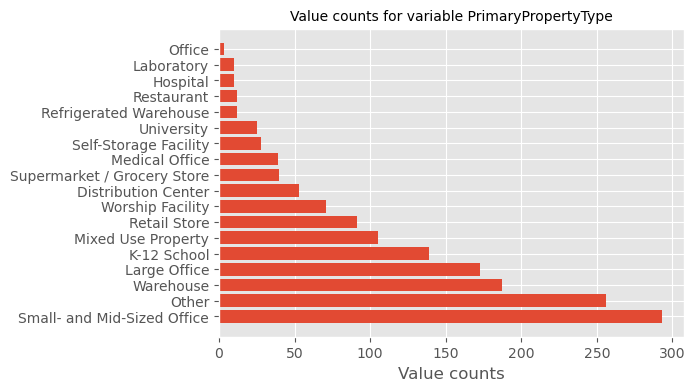

In [14]:
# Visualize the value counts for the PrimaryPropertyType variable before grouping
plt.style.use('ggplot')
plt.figure(figsize=(6, 4))
plt.barh(y=df_non_residential.PrimaryPropertyType.value_counts().index,
         width=df_non_residential.PrimaryPropertyType.value_counts().values)
plt.xlabel('Value counts')
plt.title('Value counts for variable PrimaryPropertyType', fontsize=10)
plt.savefig("barh_plot_primarypropertytype_value_counts_before", dpi=300, bbox_inches='tight')
plt.show()

In [15]:
# Manually replace values in the PrimaryPropertyType variable
df_non_residential.PrimaryPropertyType.replace({
    "Distribution Center": "Warehouse",
    "Self-Storage Facility": "Warehouse",
    "University": "K-12 School",
    "Refrigerated Warehouse": "Warehouse",
    "Restaurant": "Other",
    "Laboratory": "Medical Office",
    "Hospital": "Medical Office",
    "Office": "Small- and Mid-Sized Office"
}, inplace=True)

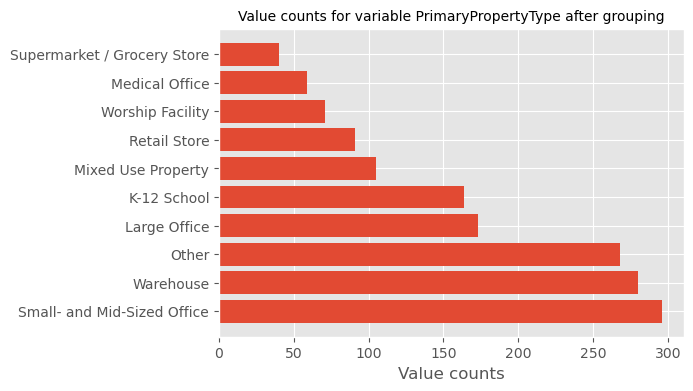

In [16]:
# Les nombres de chaque valeur dans PrimaryPropertyType
plt.style.use('ggplot')
plt.figure(figsize=(6, 4))
plt.barh(y=(
    df_non_residential.PrimaryPropertyType.value_counts()).index,
    width=(df_non_residential.PrimaryPropertyType.value_counts()).values,
)
plt.xlabel('Value counts')
plt.title('Value counts for variable PrimaryPropertyType after grouping', fontsize=10)
plt.savefig("barh_plot_primarypropertytype_value_counts_after",dpi=300,bbox_inches = 'tight')
plt.show()

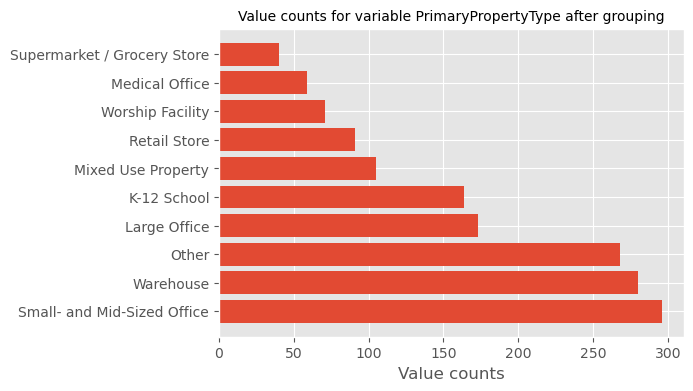

In [17]:
# Visualize the value counts for the PrimaryPropertyType variable after grouping
plt.style.use('ggplot')
plt.figure(figsize=(6, 4))
plt.barh(y=df_non_residential.PrimaryPropertyType.value_counts().index,
         width=df_non_residential.PrimaryPropertyType.value_counts().values)
plt.xlabel('Value counts')
plt.title('Value counts for variable PrimaryPropertyType after grouping', fontsize=10)
plt.savefig("barh_plot_primarypropertytype_value_counts_after", dpi=300, bbox_inches='tight')
plt.show()

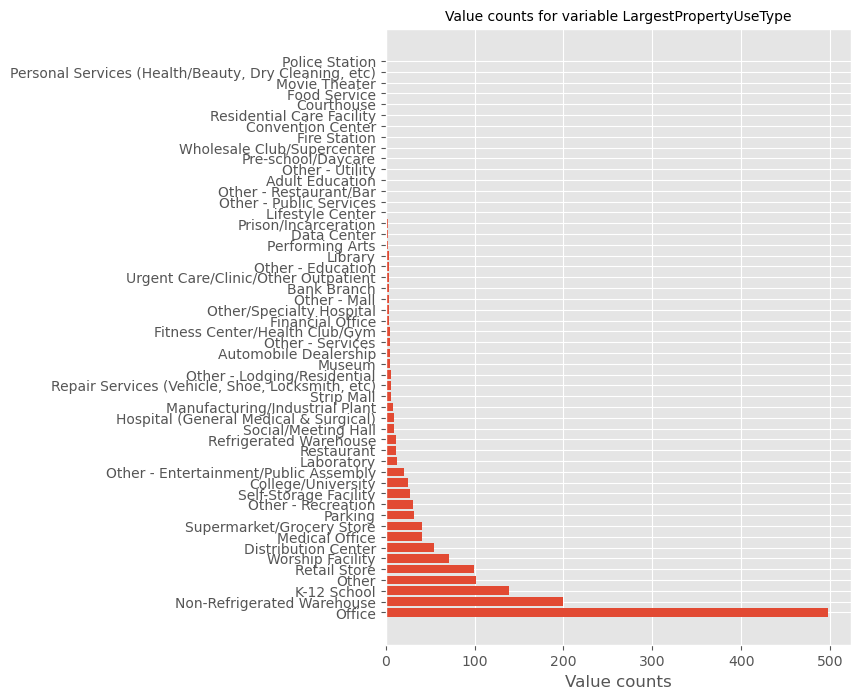

In [18]:
# Visualize the value counts for the LargestPropertyUseType variable before grouping
plt.figure(figsize=(6, 8))
plt.barh(y=df_non_residential.LargestPropertyUseType.value_counts().index,
         width=df_non_residential.LargestPropertyUseType.value_counts().values)
plt.xlabel('Value counts')
plt.title('Value counts for variable LargestPropertyUseType', fontsize=10)
plt.savefig("barh_plot_LargestPropertyUseType_value_counts_before", dpi=300, bbox_inches='tight')
plt.show()

In [19]:
# Find values in the LargestPropertyUseType variable that appear less than 30 times
count_over_30 = df_non_residential.LargestPropertyUseType.value_counts() < 30
count_over_30 = count_over_30.loc[count_over_30.values == True].index.tolist()

# Replace the above values with "Other"
df_non_residential.LargestPropertyUseType.replace(count_over_30, 'Other', inplace=True)

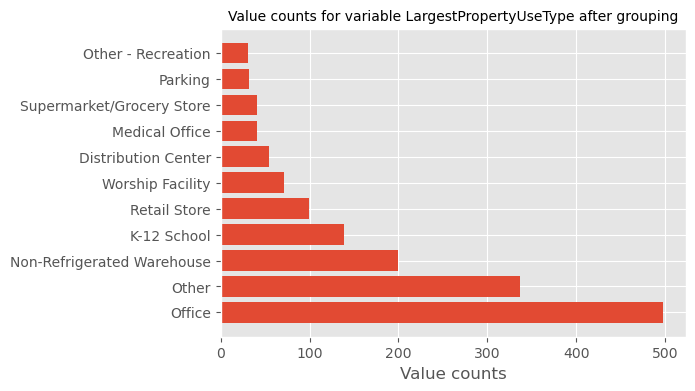

In [20]:
# Visualize the value counts for the LargestPropertyUseType variable after grouping
plt.figure(figsize=(6, 4))
plt.barh(y=df_non_residential.LargestPropertyUseType.value_counts().index,
         width=df_non_residential.LargestPropertyUseType.value_counts().values)
plt.xlabel('Value counts')
plt.title('Value counts for variable LargestPropertyUseType after grouping', fontsize=10)
plt.savefig("barh_plot_LargestPropertyUseType_value_counts_after", dpi=300, bbox_inches='tight')
plt.show()

## Parking GFA

In [22]:
# Calculate the proportion of parking GFA
parking_proportion = df_non_residential.PropertyGFAParking / df_non_residential.PropertyGFATotal

# Remove buildings with more than 60% parking GFA
df_non_residential.drop(index=parking_proportion[parking_proportion > 0.6].index, inplace=True)

## Abnormal entries
The variable ComplianceStatus indicates whether the building benchmarking is compliant. Buildings that are non-compliant provide unreliable data and should be removed.

According to the Seattle Energy Benchmarking website:

Reports with unusually low or high (outlier) EUIs or other errors will be flagged for accuracy and required to make corrections.## Valeurs aberrantes

In [23]:
# Check the values in the ComplianceStatus variable
df_non_residential.ComplianceStatus.value_counts(dropna=False)

Compliant                       1414
Error - Correct Default Data      88
Non-Compliant                     16
Missing Data                      15
Name: ComplianceStatus, dtype: int64

In [24]:
# Remove Non-Compliant buildings
non_compliant = df_non_residential[df_non_residential["ComplianceStatus"] == "Non-Compliant"]
df_non_residential.drop(index=non_compliant.index, inplace=True)

In [25]:
# Check for remaining buildings marked as outliers
df_non_residential.Outlier.value_counts(dropna=False)

NaN            1515
Low outlier       2
Name: Outlier, dtype: int64

In [26]:
# Remove rows flagged as outliers
df_non_residential.drop(index=df_non_residential[~df_non_residential["Outlier"].isna()].index, inplace=True)

Given that this dataset records energy consumption and CO2 emissions, any negative values are not normal.

In [28]:
# Check for negative values
(df_non_residential.select_dtypes(exclude=["object"]) < 0).sum()

OSEBuildingID                         0
ZipCode                               0
CouncilDistrictCode                   0
Latitude                              0
Longitude                          1514
YearBuilt                             0
NumberofBuildings                     0
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
LargestPropertyUseTypeGFA             0
SecondLargestPropertyUseTypeGFA       0
ThirdLargestPropertyUseTypeGFA        0
ENERGYSTARScore                       0
SiteEUI(kBtu/sf)                      0
SiteEUIWN(kBtu/sf)                    0
SourceEUI(kBtu/sf)                    0
SourceEUIWN(kBtu/sf)                  0
SiteEnergyUse(kBtu)                   0
SiteEnergyUseWN(kBtu)                 0
SteamUse(kBtu)                        0
Electricity(kWh)                      0
Electricity(kBtu)                     0
NaturalGas(therms)                    0


In [27]:
# Check for negative values
(df_non_residential.select_dtypes(exclude=["object"]) < 0).sum()

# Remove buildings with negative energy consumption and emissions
negative = df_non_residential.loc[
    (df_non_residential["SourceEUIWN(kBtu/sf)"] < 0)
    | (df_non_residential["Electricity(kWh)"] < 0)
    | (df_non_residential["Electricity(kBtu)"] < 0)
    | (df_non_residential["TotalGHGEmissions"] < 0)
    | (df_non_residential["GHGEmissionsIntensity"] < 0)
]
df_non_residential.drop(index=negative.index, inplace=True)

Except for the Longitude variable, five variables contain negative values, which will be removed.

In [29]:
# Eliminer les bâtiments à consommation et émission négatives
negative = df_non_residential.loc[
    (df_non_residential["SourceEUIWN(kBtu/sf)"] < 0)
    | (df_non_residential["Electricity(kWh)"] < 0)
    | (df_non_residential["Electricity(kBtu)"] < 0)
    | (df_non_residential["TotalGHGEmissions"] < 0)
    | (df_non_residential["GHGEmissionsIntensity"] < 0)
]
negative

,OSEBuildingID,PrimaryPropertyType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity


In [30]:
df_non_residential.drop(index=negative.index, inplace=True)

## Outliers
Here, I'm looking for excessively high values and handling them based on the nature of their high values.

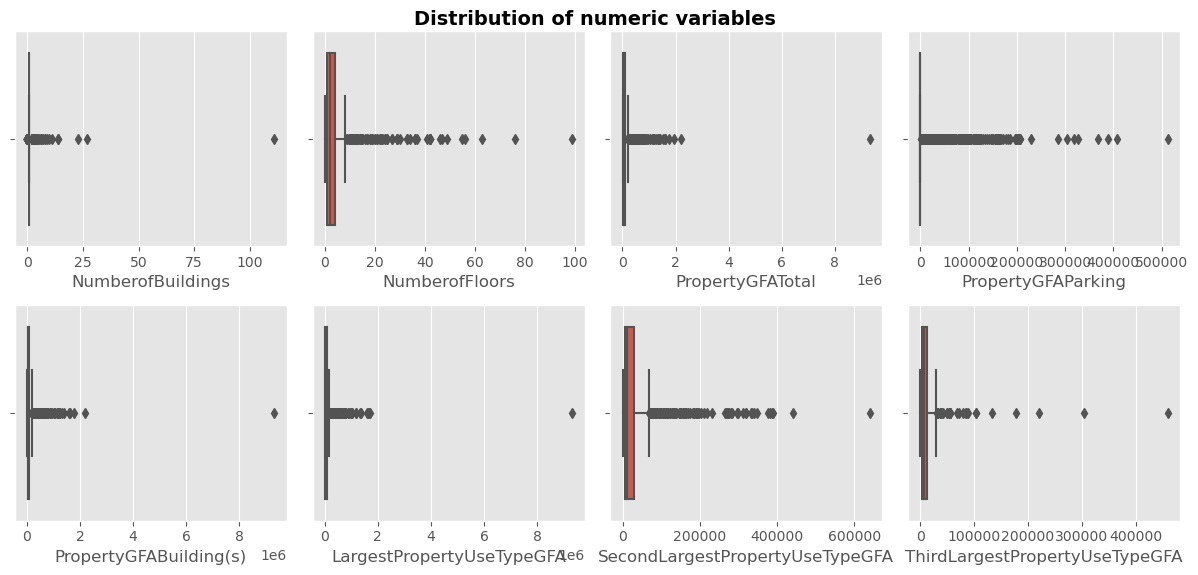

In [31]:
# Plotting variables with box plots to identify potential outliers
columns = ['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
           'PropertyGFAParking', 'PropertyGFABuilding(s)',
           'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
           'ThirdLargestPropertyUseTypeGFA']

figure, axes = plt.subplots(round(len(columns) / 4), 4, sharex=False, figsize=(12, 6))
y = 0
for col in columns:
    i, j = divmod(y, 4)
    sns.boxplot(x=df_non_residential[col], ax=axes[i, j])
    y = y + 1
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.suptitle("Distribution of numeric variables", fontsize=14, fontweight="bold")
plt.savefig('boxplot_outlier', dpi=300)
plt.show()

There are extremely large values in the variables NumberofBuildings, NumberofFloors, PropertyGFATotal, etc.

In [32]:
# Search for outliers in the NumberofBuildings variable
df_non_residential.loc[df_non_residential.NumberofBuildings == df_non_residential.NumberofBuildings.max()]

,OSEBuildingID,PrimaryPropertyType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
3274,49967,K-12 School,University of Washington - Seattle Campus,NE 45th St & Brooklyn Ave,98105.0,1625049001,4,NORTHEAST,47.65644,-122.31041,1900,111.0,0,9320156,0,9320156,Other,9320156.0,NaN,NaN,NaN,NaN,NaN,NaN,93.800003,0.0,246.600006,0.0,873923712.0,0.0,84985240.0,192577488.0,657074389.0,0.0,0.0,False,NaN,Compliant,NaN,11140.56,1.2


The University of Washington, although large, may indeed contain 111 buildings.

In [33]:
# Search for buildings with over 50 floors
df_non_residential[df_non_residential.NumberofFloors > 50]

,OSEBuildingID,PrimaryPropertyType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
233,357,Large Office,Seattle Municipal Tower (2030),700 Fifth Avenue,98104.0,0942000720,3,DOWNTOWN,47.60501,-122.32988,1990,1.0,63,1354987,159600,1195387,Office,1191115.0,Parking,159599.0,Other,18656.0,2014201320112010200920082007,89.0,50.400002,50.400002,158.100006,158.100006,6.157618e+07,6.157618e+07,0.000,18046946.0,61576180.0,0.00000,0.0,False,NaN,Compliant,NaN,429.27,0.32
271,399,Large Office,1201 Third Avenue,1201 3rd ave,98101.0,1974700120,7,DOWNTOWN,47.60723,-122.33611,1988,1.0,55,1400000,285000,1115000,Office,994116.0,Parking,264481.0,Other,133598.0,2017201120102007,92.0,46.700001,48.500000,140.199997,145.300003,5.307916e+07,5.514030e+07,2179487.750,14499658.0,49472833.0,14268.40039,1426840.0,False,NaN,Compliant,NaN,588.90,0.42
292,422,Large Office,Two Union Square,601 Union St.,98101.0,1976700125,7,DOWNTOWN,47.61043,-122.33206,1989,1.0,56,1605578,389860,1215718,Office,1314475.0,Parking,389860.0,Other,30744.0,20092005,97.0,36.799999,37.900002,110.300003,113.300003,4.951770e+07,5.098450e+07,915654.875,13505807.0,46081813.0,25202.29883,2520230.0,False,NaN,Compliant,NaN,525.78,0.33
559,775,Large Office,Columbia Center - 2015,701 5th Avenue,98104.0,0942000640,7,DOWNTOWN,47.60454,-122.33072,1985,1.0,76,1952220,319400,1632820,Office,1680937.0,Parking,319368.0,NaN,NaN,2017201620152012200920072006,86.0,55.299999,55.099998,167.300003,166.500000,9.293764e+07,9.253726e+07,0.000,25747908.0,87851862.0,50857.63281,5085763.0,False,NaN,Compliant,NaN,882.56,0.45
1359,21611,Worship Facility,Seattle Chinese Baptist Church,5801 Beacon Avenue South,98108.0,2124049098,2,GREATER DUWAMISH,47.55072,-122.30265,1977,1.0,99,21948,0,21948,Worship Facility,21948.0,NaN,NaN,NaN,NaN,NaN,80.0,14.900000,14.900000,46.599998,46.599998,3.260012e+05,3.260012e+05,0.000,95545.5,326001.0,0.00000,0.0,False,NaN,Compliant,NaN,2.27,0.10


In [34]:
# The number of floors for 'Seattle Chinese Baptist Church' should be 2, according to online research
df_non_residential.loc[df_non_residential["PropertyName"] == "Seattle Chinese Baptist Church", "NumberofFloors"] = 2

In [35]:
# Search for the largest PropertyGFATotal value
df_non_residential.loc[df_non_residential['PropertyGFATotal'] == df_non_residential['PropertyGFATotal'].max()]

,OSEBuildingID,PrimaryPropertyType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
3274,49967,K-12 School,University of Washington - Seattle Campus,NE 45th St & Brooklyn Ave,98105.0,1625049001,4,NORTHEAST,47.65644,-122.31041,1900,111.0,0,9320156,0,9320156,Other,9320156.0,NaN,NaN,NaN,NaN,NaN,NaN,93.800003,0.0,246.600006,0.0,873923712.0,0.0,84985240.0,192577488.0,657074389.0,0.0,0.0,False,NaN,Compliant,NaN,11140.56,1.2


The University of Washington - Seattle Campus is a large property. Although it is a high value, it is a valid entry. 

## Atypical values

In [36]:
# Searching for outlier values for the variable YearBuilt
np.sort(df_non_residential.YearBuilt.unique())

array([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
       1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
       1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1944, 1945, 1946,
       1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957,
       1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
       1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015], dtype=int64)

In [ ]:
df_non_residential['Neighborhood'].value_counts()

GREATER DUWAMISH          339
DOWNTOWN                  302
MAGNOLIA / QUEEN ANNE     141
LAKE UNION                131
EAST                      107
NORTHEAST                 104
NORTHWEST                  76
BALLARD                    62
NORTH                      55
CENTRAL                    47
SOUTHEAST                  43
DELRIDGE                   42
SOUTHWEST                  39
North                       8
Ballard                     6
Delridge                    4
Northwest                   4
Central                     3
DELRIDGE NEIGHBORHOODS      1
Name: Neighborhood, dtype: int64

In [37]:
# The neighborhood 'delridge' is represented twice. Correct one of them
df_non_residential['Neighborhood'].replace({"delridge neighborhoods": 'delridge'}, inplace=True)

## Values with zero as entries

In [38]:
# Count of zero values per variable
df_zero_counts = (df_non_residential == 0).sum().to_frame().reset_index()
df_zero_counts.columns = ['variable', 'counts']

<Figure size 600x400 with 0 Axes>

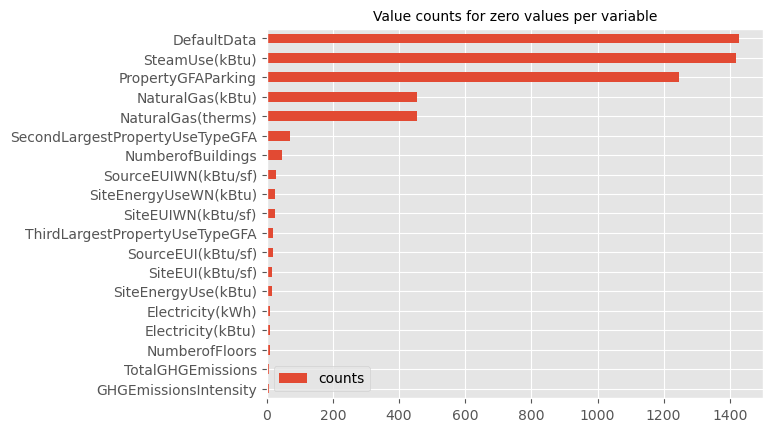

In [40]:
plt.figure(figsize=(6, 4))
zero_plot = df_zero_counts[df_zero_counts.counts != 0].sort_values(
    by='counts', ascending=True)

zero_plot.plot(kind='barh', y="counts", x="variable")
plt.xlabel(None)
plt.ylabel(None)
plt.title('Value counts for zero values per variable', fontsize=10)
plt.savefig("barh_plot_zero_value_counts", dpi=300, bbox_inches='tight')
plt.show()

 For the variables PropertyGFAParking, SteamUse, NaturalGas, and Electricity, it is plausible for them to have zero values,
 as a building may not have parking space or may not consume steam/gas/electricity. I will leave these zero values intact.

The presence of zero values is abnormal for the following variables:
- NumberofBuildings
- SiteEUI(kBtu/sf)
- SiteEUIWN(kBtu/sf)
- SourceEUI(kBtu/sf)
- SourceEUIWN(kBtu/sf)
- SiteEnergyUse(kBtu)
- SiteEnergyUseWN(kBtu)
- TotalGHGEmissions
- GHGEmissionsIntensity

In [41]:
# Replace zero values with the mean values of the NumberofBuildings and NumberofFloors variables
df_non_residential[["NumberofBuildings", "NumberofFloors"]] = df_non_residential[
    ["NumberofBuildings", "NumberofFloors"]
].replace(0, df_non_residential[["NumberofBuildings", "NumberofFloors"]].mean())

In [42]:
# Find rows with zero energy consumption and zero emissions
consumption_zero = df_non_residential[
    df_non_residential["SiteEUI(kBtu/sf)"] == 0
].copy()

In [43]:
emission_zero = df_non_residential[
    df_non_residential["TotalGHGEmissions"] == 0
].copy()

## Missing values

In [44]:
# Check for missing values
nan = df_non_residential.isnull().sum().to_frame().reset_index()
nan.columns = ['variable', 'counts']
nan = nan[nan.counts != 0].sort_values(by='counts')

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 600x400 with 0 Axes>

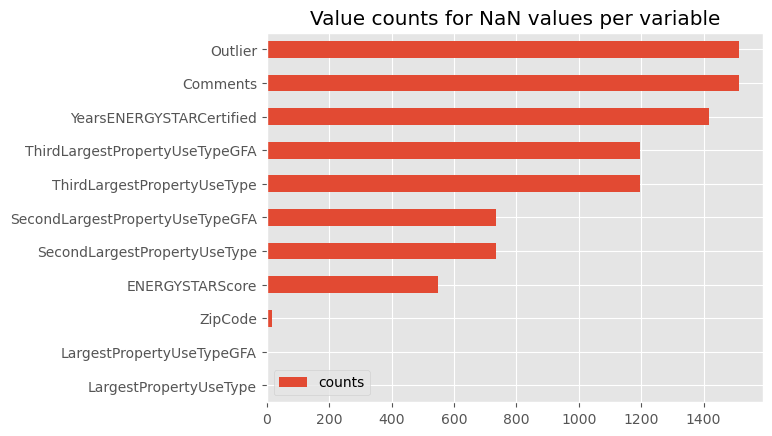

In [45]:
plt.figure(figsize=(6, 4))
nan.plot(kind='barh', y='counts', x='variable')
plt.xlabel(None)
plt.ylabel(None)
plt.title('Value counts for NaN values per variable')
plt.savefig("barh_plot_nan_values", dpi=300, bbox_inches='tight')
plt.show

The only variables to be handled here are ZipCode, LargestPropertyUseTypeGFA, and LargestPropertyUseType. <br>
The rest will not be processed as they will not be used for our analysis or modeling (due to the amount of missing values they have).

## ZipCode
Missing zip codes are replaced with the most frequent zip code from the same neighborhood.

In [46]:
# Unify the string format of the Neighborhood variable
df_non_residential.Neighborhood = df_non_residential.Neighborhood.str.lower()

In [47]:
# Find the most frequent zip code for each neighborhood
neighborhood_zipcode = (
    df_non_residential.groupby(["Neighborhood", "ZipCode"])["Neighborhood"]
    .count()
    .to_frame()
)
neighborhood_zipcode.columns = ["count"]
neighborhood_zipcode.reset_index("ZipCode", inplace=True)
neighborhood_zipcode.max(level=0)

C:\Users\zheng\AppData\Local\Temp\ipykernel_21440\1523131705.py:9: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  neighborhood_zipcode.max(level=0)


,ZipCode,count
Neighborhood,,
ballard,98134.0,47
central,98144.0,31
delridge,98146.0,25
downtown,98191.0,111
east,98136.0,55
greater duwamish,98199.0,174
lake union,98109.0,63
magnolia / queen anne,98199.0,60
north,98165.0,42


In [48]:
# Find the missing zip codes and their neighborhoods
df_missing_zip = df_non_residential[df_non_residential["ZipCode"].isna()]["Neighborhood"]

In [49]:
# Create a dictionary for ZipCode/Neighborhood.
zip_dict = {
    "north": 98165,
    "central": 98144,
    "ballard": 98134,
    "magnolia / queen anne": 98199,
    "east": 98136,
    "southeast": 98178,
    "delridge neighborhoods": 98146,
    "greater duwamish": 98199,
    "downtown": 98191,
}

# Fill the missing zip codes
df_non_residential.ZipCode = df_non_residential.ZipCode.fillna(df_non_residential.Neighborhood.map(zip_dict))

df_non_residential.ZipCode = df_non_residential.ZipCode.astype("int").astype("str")

### Property Use Type

In [50]:
# Find missing values in the LargestPropertyUseType variable
df_missing_use_type = df_non_residential[df_non_residential.LargestPropertyUseType.isna()]

In [ ]:
# saisir manuellement les valeurs
df_non_residential.loc[353, "LargestPropertyUseType"] = "Non-Refrigerated Warehouse"
df_non_residential.loc[2414, "LargestPropertyUseType"] = "Office"
df_non_residential.loc[2459, "LargestPropertyUseType"] = "Other"

In [ ]:
# Remplir la plus grande surface de propriété manquante avec la surface totale
df_non_residential.LargestPropertyUseTypeGFA.fillna(
    df_non_residential["PropertyGFATotal"], inplace=True
)

## ENERGYStarScore
La variable ENERGYStarScore est le plus influencé par le type d'utilisation du bâtiment (selon leur site Web). Je compléterai donc les valeurs manquantes par la moyenne par type de bâtiment.

In [ ]:
df_non_residential['ENERGYSTARScore'] = df_non_residential['ENERGYSTARScore'].fillna(
    df_non_residential.groupby('PrimaryPropertyType')['ENERGYSTARScore'].transform('mean'))

# Feature enginerring

In [ ]:
df_final = df_non_residential.copy()

## Ajouter de nouvelles variables

In [ ]:
# New variable: buildings' age
from datetime import datetime

df_final["BuildingAge"] = datetime.now().year - df_final["YearBuilt"]
df_final.drop(columns=["YearBuilt"], inplace=True)

# Nouvelle variable : pourcentage de parking dans la surface totale
df_final["parking_area_prcnt"] = (
    df_final["PropertyGFAParking"] / df_final["PropertyGFATotal"]
)

# Nouvelle variable : pourcentage de la plus grande surface de propriété dans la surface totale du bâtiment
df_final["largest_property_GFA_prcnt"] = (
    df_final["LargestPropertyUseTypeGFA"] / df_final["PropertyGFABuilding(s)"]
)


In [ ]:
# Les variables Electricity(kWh) et NaturalGas(therms) seront enlevées
# car ces informations sont déjà présentes dans les données (en unité kBtu).
df_final.drop(columns=["Electricity(kWh)", "NaturalGas(therms)"], inplace=True)

## Log transformation

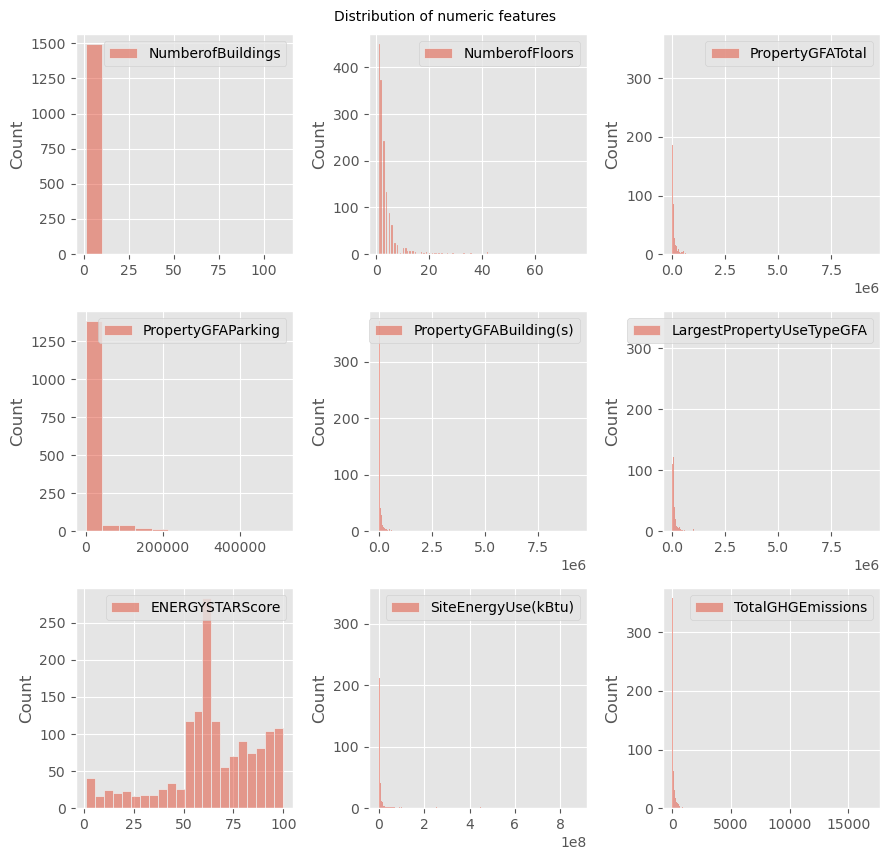

In [ ]:
var_numeric = df_final[['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
                        'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'ENERGYSTARScore',
                        'SiteEnergyUse(kBtu)', 'TotalGHGEmissions']].copy()

figure, axes = plt.subplots(3, 3,
                            sharex=False, figsize=(9, 9))
y = 0
for var in var_numeric.columns:
    i, j = divmod(y, 3)
    variable = df_final[[var]]
    sns.histplot(variable, ax=axes[i, j])
    y = y + 1
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.suptitle('Distribution of numeric features', fontsize=10)
plt.savefig('histplot_skewed_features',bbox_inches='tight',dpi=300)
plt.show()

In [ ]:
# Transformez certains variables asymétriques en logarithme naturel.
skewed_features = ["PropertyGFATotal",
                   "PropertyGFABuilding(s)",
                   'LargestPropertyUseTypeGFA',
                   'TotalGHGEmissions',
                   'SiteEnergyUse(kBtu)'
                   ]

features_log = ["PropertyGFATotal_log",
                "PropertyGFABuilding(s)_log",
                'LargestPropertyUseTypeGFA_log',
                'TotalGHGEmissions_log',
                'SiteEnergyUse(kBtu)_log'
                ]

for feature, logged in zip(skewed_features, features_log):
    df_final[logged] = np.log(df_final[feature])

In [ ]:
df_final.drop(index=df_final[df_final.TotalGHGEmissions_log < 0].index,inplace=True)

KeyboardInterrupt: 

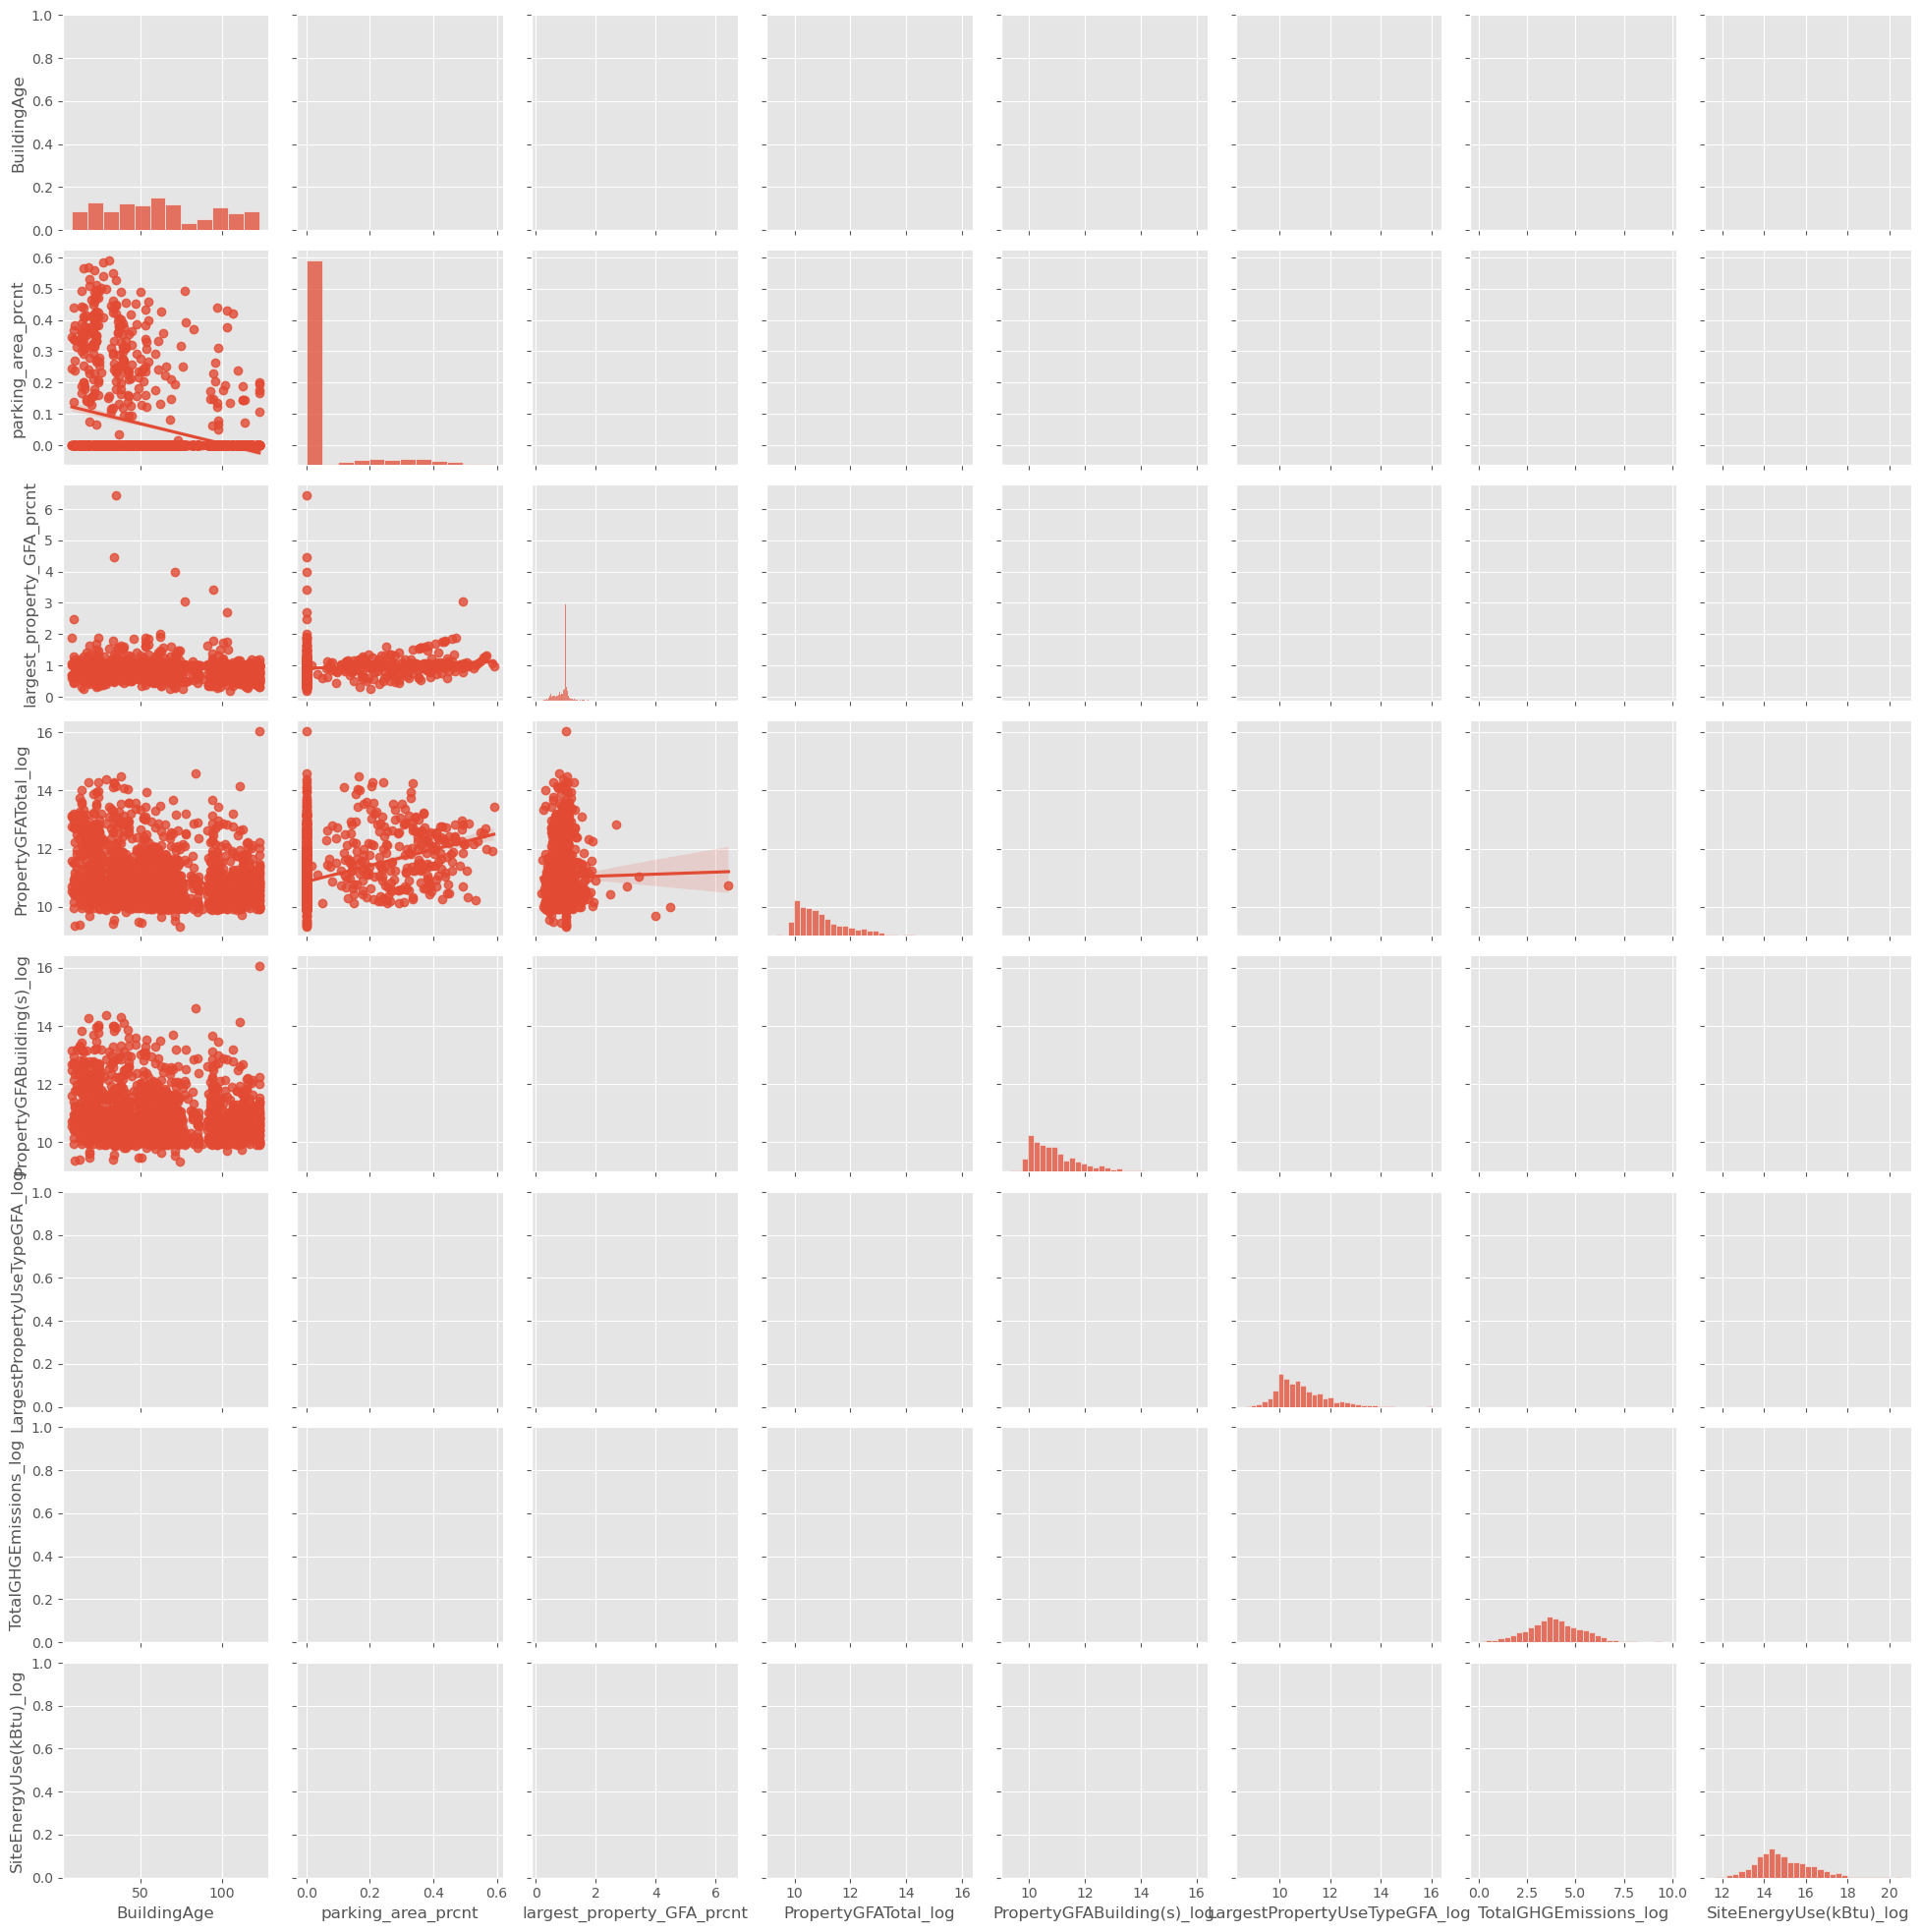

In [ ]:
#Examinez les relations entre les caractéristiques et les variables cibles, 
# en prévision de la sélection d'un type de modèle.
var_corr = [
    'BuildingAge',
    'parking_area_prcnt',
    'largest_property_GFA_prcnt',
    'PropertyGFATotal_log',
    'PropertyGFABuilding(s)_log',
    'LargestPropertyUseTypeGFA_log',
    'TotalGHGEmissions_log',
    'SiteEnergyUse(kBtu)_log']

sns.pairplot(df_final[var_corr],kind='reg')
plt.suptitle('Correlations between variables',fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig('pairplot', bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
df_final.shape

(1487, 46)

In [ ]:
# df_final.to_csv('df_final.csv', index=False)